In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Función polinómica de grado 3: 2 * x**3 - 3 * x**2 + 5 * x + 3
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

In [3]:
# Derivada de la función polinómica
def gradient(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

In [4]:
# Descenso de gradiente estocástico
def stochastic_gradient_descent(x_init, learning_rate, epochs):
    x = x_init
    for epoch in range(epochs):
        x = x - learning_rate * gradient(x) + np.random.normal(0, 1)  # Añadir ruido estocástico
    return x

In [5]:
# Descenso de gradiente
def gradient_descent(x_init, learning_rate, epochs):
    x = x_init
    for epoch in range(epochs):
        x = x - learning_rate * gradient(x)
    return x

In [6]:
# Descenso de gradiente por mini lotes
def mini_batch_gradient_descent(x_init, learning_rate, epochs, batch_size):
    x = x_init
    x_values = np.linspace(-5, 5, 100)  # Define x_values for creating batches
    for epoch in range(epochs):
        batch_indices = np.random.choice(len(x_values), size=batch_size, replace=False)
        batch = x_values[batch_indices]
        x = x - learning_rate * gradient(x)
    return x

In [7]:
# Datos de entrada
x_values = np.linspace(-5, 5, 100)
y_true = polynomial_function(x_values)

# Inicialización de puntos de inicio
x_init = np.random.uniform(-5, 5)


In [8]:
# Descenso de gradiente estocástico
start_time = time.time()
x_sgd = stochastic_gradient_descent(x_init, learning_rate=0.01, epochs=1000)
sgd_time = time.time() - start_time

# Descenso de gradiente
start_time = time.time()
x_gd = gradient_descent(x_init, learning_rate=0.01, epochs=1000)
gd_time = time.time() - start_time

# Descenso de gradiente por mini lotes
start_time = time.time()
x_mbgd = mini_batch_gradient_descent(x_init, learning_rate=0.01, epochs=1000, batch_size=10)
mbgd_time = time.time() - start_time

c:\Python311\Lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
c:\Python311\Lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


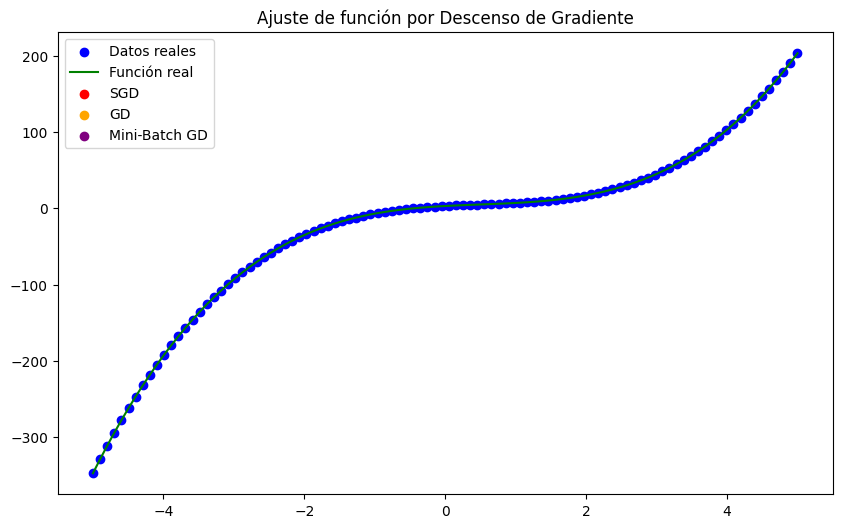

Tiempo de ejecución SGD: 0.021754980087280273 segundos
Tiempo de ejecución GD: 0.015457868576049805 segundos
Tiempo de ejecución Mini-Batch GD: 0.04130911827087402 segundos


In [9]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_true, label='Datos reales', color='blue')
plt.plot(x_values, polynomial_function(x_values), label='Función real', color='green')
plt.scatter(x_sgd, polynomial_function(x_sgd), label='SGD', color='red')
plt.scatter(x_gd, polynomial_function(x_gd), label='GD', color='orange')
plt.scatter(x_mbgd, polynomial_function(x_mbgd), label='Mini-Batch GD', color='purple')

plt.title('Ajuste de función por Descenso de Gradiente')
plt.legend()
plt.show()

# Comparar tiempos de ejecución
print(f'Tiempo de ejecución SGD: {sgd_time} segundos')
print(f'Tiempo de ejecución GD: {gd_time} segundos')
print(f'Tiempo de ejecución Mini-Batch GD: {mbgd_time} segundos')


In [10]:
# Comparar fitness (evaluación numérica)
fitness_sgd = np.sum((polynomial_function(x_sgd) - y_true)**2)
fitness_gd = np.sum((polynomial_function(x_gd) - y_true)**2)
fitness_mbgd = np.sum((polynomial_function(x_mbgd) - y_true)**2)

print(f'Fitness SGD: {fitness_sgd}')
print(f'Fitness GD: {fitness_gd}')
print(f'Fitness Mini-Batch GD: {fitness_mbgd}')

Fitness SGD: nan
Fitness GD: nan
Fitness Mini-Batch GD: nan
